<a href="https://colab.research.google.com/github/hayatk190/Mohammed_Hayat_INFO5731_spring2025.ipynb/blob/main/Mohammed_Hayat_Assignment_03_ipynb(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
import csv
import string

# Preprocessing function: remove punctuation, convert to lowercase,
# and replace punctuation with spaces.
def preprocess_text(text):
    processed = ''
    for char in text.lower():
        if char in string.ascii_lowercase or char.isdigit() or char.isspace():
            processed += char
        else:
            processed += ' '  # Replace punctuation with a space
    return processed

# Read CSV file using the built-in csv module.
filename = 'semantic_scholar_papers.csv'  # Change if needed

all_texts = []

with open(filename, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip the header row

    # Identify the indices for "title" and "abstract" columns.
    col_idx_title = header.index('title')
    col_idx_abstract = header.index('abstract')

    # Collect all title and abstract text into a list.
    for row in reader:
        title = row[col_idx_title]
        abstract = row[col_idx_abstract]
        if title:    # Check if not empty
            all_texts.append(title)
        if abstract: # Check if not empty
            all_texts.append(abstract)

# Combine all text into one string.
combined_text = ' '.join(all_texts)

# Preprocess the combined text (remove punctuation, lowercase).
processed_text = preprocess_text(combined_text)

# Split processed text into words.
words = processed_text.split()

# Generate bigrams (N=2).
bigram_counts = {}
for i in range(len(words) - 1):
    bigram = words[i] + ' ' + words[i+1]
    bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1

# Generate trigrams (N=3).
trigram_counts = {}
for i in range(len(words) - 2):
    trigram = words[i] + ' ' + words[i+1] + ' ' + words[i+2]
    trigram_counts[trigram] = trigram_counts.get(trigram, 0) + 1

# Sort bigrams and trigrams by frequency in descending order.
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)
sorted_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)

# Display top 10 bigrams.
print("Top 10 Bigrams:")
for bigram, freq in sorted_bigrams[:10]:
    print(f"{bigram}: {freq}")

# Display top 10 trigrams.
print("\nTop 10 Trigrams:")
for trigram, freq in sorted_trigrams[:10]:
    print(f"{trigram}: {freq}")






Top 10 Bigrams:
machine learning: 2146
of the: 770
in the: 402
of machine: 334
in this: 258
deep learning: 255
learning algorithms: 252
can be: 244
learning and: 239
to the: 233

Top 10 Trigrams:
of machine learning: 332
in machine learning: 169
machine learning algorithms: 155
machine learning and: 146
in this paper: 116
state of the: 111
of the art: 106
support vector machines: 105
machine learning models: 102
as well as: 100


Question 1 (2)

In [2]:
import csv
import string

# Preprocessing function: remove punctuation, convert to lowercase,
# and replace punctuation with spaces.
def preprocess_text(text):
    processed = ''
    for char in text.lower():
        if char in string.ascii_lowercase or char.isdigit() or char.isspace():
            processed += char
        else:
            processed += ' '  # Replace punctuation with a space
    return processed

filename = 'semantic_scholar_papers.csv'  # Update path/filename as needed

all_texts = []

with open(filename, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip the header row

    # Identify the indices for "title" and "abstract" columns.
    col_idx_title = header.index('title')
    col_idx_abstract = header.index('abstract')

    # Collect all title and abstract text into a list.
    for row in reader:
        title = row[col_idx_title]
        abstract = row[col_idx_abstract]
        if title:    # Check if not empty
            all_texts.append(title)
        if abstract: # Check if not empty
            all_texts.append(abstract)

# Combine all text into one string
combined_text = ' '.join(all_texts)

# Preprocess the combined text (remove punctuation, lowercase)
processed_text = preprocess_text(combined_text)

# Split processed text into a list of words
words = processed_text.split()

# Count the occurrences of all single words
word_counts = {}
for w in words:
    word_counts[w] = word_counts.get(w, 0) + 1

# Count all bigrams
bigram_counts = {}
for i in range(len(words) - 1):
    bigram = words[i] + ' ' + words[i+1]
    bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1

# Calculate bigram probabilities: count(w1, w2) / count(w1)
bigram_probabilities = {}
for bigram, count_bi in bigram_counts.items():
    w1, w2 = bigram.split()
    # Avoid division-by-zero; in normal usage word_counts[w1] should never be zero
    prob = count_bi / word_counts[w1]
    bigram_probabilities[bigram] = prob

# Sort bigrams by descending probability
sorted_bigrams_by_prob = sorted(
    bigram_probabilities.items(),
    key=lambda x: x[1],
    reverse=True
)

# Display top 10 bigrams by probability
print("Top 10 Bigrams by Probability:")
for bigram, prob in sorted_bigrams_by_prob[:10]:
    print(f"{bigram} -> {prob:.4f}")


Top 10 Bigrams by Probability:
28x28 grayscale -> 1.0000
grayscale images -> 1.0000
freely available -> 1.0000
mutate that -> 1.0000
asics known -> 1.0000
tpus this -> 1.0000
ranging from -> 1.0000
tablets up -> 1.0000
november 2015 -> 1.0000
precipitation nowcasting -> 1.0000


Question 1 (3)

In [6]:
import csv
import string
import pandas as pd

###############################################################################
# 1. HELPER FUNCTIONS
###############################################################################

def preprocess_text(text):
    """
    Lowercases the text, replaces punctuation with spaces,
    and returns the cleaned string.
    """
    processed_chars = []
    for char in text.lower():
        # Keep letters, digits, and spaces. Replace other chars with space.
        if char in string.ascii_lowercase or char.isdigit() or char.isspace():
            processed_chars.append(char)
        else:
            processed_chars.append(' ')
    return "".join(processed_chars)

def is_nounish(word):
    """
    Extremely naive heuristic for 'noun-like' words:
      - ends with 'tion', 'ment', 'ness', 'ty', 'ing'
    """
    w = word.lower()
    return (
        w.endswith("tion")
        or w.endswith("ment")
        or w.endswith("ness")
        or w.endswith("ty")
        or w.endswith("ing")
    )

def is_adjectivish(word):
    """
    Extremely naive heuristic for 'adjective-like' words:
      - ends with 'ive', 'ous', 'ic', 'al'
    """
    w = word.lower()
    return (
        w.endswith("ive")
        or w.endswith("ous")
        or w.endswith("ic")
        or w.endswith("al")
    )

def extract_naive_noun_phrases(text):
    """
    Returns a list of 'noun phrases' based on very naive chunking:
      - If a word meets 'is_nounish()' or 'is_adjectivish()',
        group consecutive matches into a single chunk.
    """
    words = text.split()
    noun_phrases = []
    current_chunk = []

    for token in words:
        if is_nounish(token) or is_adjectivish(token):
            current_chunk.append(token)
        else:
            if current_chunk:
                noun_phrases.append(" ".join(current_chunk))
                current_chunk = []
    # End chunk if it's still open
    if current_chunk:
        noun_phrases.append(" ".join(current_chunk))
    return noun_phrases

###############################################################################
# 2. READ THE CSV & EXTRACT REVIEWS
###############################################################################

filename = "semantic_scholar_papers.csv"  # Adjust path/name if needed
MAX_REVIEWS = 100  # We'll limit to 100 reviews for demonstration

reviews = []
with open(filename, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)  # skip header row

    # Locate the column you want to treat as a "review"
    if 'abstract' in header:
        text_col_idx = header.index('abstract')
    else:
        # Fallback or pick another column if 'abstract' doesn't exist
        text_col_idx = 0  # default to first column, for example

    count_reviews = 0
    for row in reader:
        if text_col_idx < len(row):
            text = row[text_col_idx]
            if text:
                reviews.append(text)
                count_reviews += 1
        if count_reviews >= MAX_REVIEWS:
            break

###############################################################################
# 3. NAIVE NOUN PHRASE EXTRACTION & FREQUENCIES
###############################################################################

list_of_nps_per_review = []  # list of lists; each sub-list is the noun phrases for that review
all_noun_phrases = set()

for review_text in reviews:
    cleaned = preprocess_text(review_text)
    nps = extract_naive_noun_phrases(cleaned)
    list_of_nps_per_review.append(nps)
    all_noun_phrases.update(nps)

all_noun_phrases = sorted(all_noun_phrases)  # consistent column ordering

# Count occurrences: freq[i][np] = how many times np appears in review i
freq = []
for nps in list_of_nps_per_review:
    count_map = {}
    for np in nps:
        count_map[np] = count_map.get(np, 0) + 1
    freq.append(count_map)

# Find max frequency of each noun phrase across all reviews
max_freq = {}
for np in all_noun_phrases:
    max_val = 0
    for i in range(len(reviews)):
        max_val = max(max_val, freq[i].get(np, 0))
    max_freq[np] = max_val

# Compute relative probabilities
#   P_rel = freq(np in review) / max_freq(np across entire dataset)
relative_prob = []
for i in range(len(reviews)):
    row_probs = {}
    for np in all_noun_phrases:
        row_probs[np] = 0.0
        if max_freq[np] > 0:
            row_probs[np] = freq[i].get(np, 0) / max_freq[np]
    relative_prob.append(row_probs)

###############################################################################
# 4A. CREATE & SHOW A PANDAS DATAFRAME
###############################################################################

df = pd.DataFrame(relative_prob)  # from list of dicts
# Reorder columns
df = df[all_noun_phrases]
df.index = [f"Review_{i+1}" for i in range(len(reviews))]

# Round to 2 decimals to keep output neat
df = df.round(2)

# Show the first 5 reviews × first 10 noun phrases
print("=== Partial View of Relative Noun Phrase Probabilities ===")
display(df.iloc[:5, :10])

# Save full matrix to CSV
df.to_csv("relative_probabilities.csv", index=True)
print("\nFull DataFrame saved to 'relative_probabilities.csv' (Check left file pane in Colab).")

###############################################################################
# 4B. PRINT TOP-N NOUN PHRASES PER REVIEW
###############################################################################

TOP_N = 5
print(f"\n=== Top {TOP_N} Noun Phrases per Review ===")
for i, row_probs in enumerate(relative_prob):
    review_name = f"Review_{i+1}"
    # row_probs is {np: probability}, sort by descending probability
    sorted_phrases = sorted(row_probs.items(), key=lambda x: x[1], reverse=True)
    # Keep top N with nonzero probabilities
    top_phrases = [(p, val) for (p, val) in sorted_phrases if val > 0][:TOP_N]

    print(f"{review_name}:")
    if not top_phrases:
        print("  (No noun phrases found)\n")
        continue

    for phrase, val in top_phrases:
        print(f"  {phrase} -> {val:.2f}")
    print()


=== Partial View of Relative Noun Phrase Probabilities ===


,ability,academic,academic teaching,accelerating,accelerating computational,accessibility,according,accounting,achieving,acquiring
Review_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Full DataFrame saved to 'relative_probabilities.csv' (Check left file pane in Colab).

=== Top 5 Noun Phrases per Review ===
Review_1:
  benchmarking -> 1.00
  comprising -> 1.00
  original -> 1.00
  replacement -> 1.00
  testing -> 1.00

Review_2:
  application -> 1.00
  compelling -> 1.00
  experiment -> 1.00
  flexibility -> 1.00
  heterogeneous -> 1.00

Review_3:
  conducting -> 1.00
  deploying -> 1.00
  executing -> 1.00
  expressing -> 1.00
  heterogeneous -> 1.00

Review_4:
  challenging -> 1.00
  convolutional -> 1.00
  crucial -> 1.00
  extending -> 1.00
  forecasting -> 1.00

Review_5:
  addition -> 1.00
  application specific -> 1.00
  biological -> 1.00
  building -> 1.00
  challenging -> 1.00

Review_6:
  accounting -> 1.00
  addition -> 1.00
  attempting -> 1.00
  becoming -> 1.00
  changing -> 1.00

Review_7:
  basic -> 1.00
  commercial -> 1.00
  hospital -> 1.00
  including -> 1.00
  individual -> 1.00

Review_8:
  academic -> 1.00
  bringing -> 1.00
  commercial -> 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [7]:
import csv
import math
import pandas as pd
import string

###############################################################################
# 1. HELPER FUNCTIONS
###############################################################################

def preprocess_text(text):
    """
    Lowercases text, replaces punctuation with spaces, and strips extra spaces.
    """
    text = text.lower()
    # Replace punctuation with space
    for p in string.punctuation:
        text = text.replace(p, " ")
    # You could also remove digits or handle them differently if desired
    # Remove extra spaces
    text = " ".join(text.split())
    return text

###############################################################################
# 2. READ THE CSV & EXTRACT DOCUMENTS
###############################################################################

filename = "semantic_scholar_papers.csv"  # Adjust to your file
MAX_DOCS = 100  # If you want to limit to 100 documents for demonstration

documents = []
with open(filename, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    header = next(reader)  # skip header row

    # Try to locate a column named "abstract"; if not found, fallback to first column
    if "abstract" in header:
        text_col_idx = header.index("abstract")
    else:
        text_col_idx = 0  # fallback if no 'abstract' column

    count_docs = 0
    for row in reader:
        if text_col_idx < len(row):
            text = row[text_col_idx]
            if text:
                documents.append(text)
                count_docs += 1
        if count_docs >= MAX_DOCS:
            break

# Preprocess each document
documents = [preprocess_text(doc) for doc in documents]

###############################################################################
# 3. TOKENIZE & BUILD TF (TERM FREQUENCY)
###############################################################################
# docs_terms[i] = a dictionary mapping term -> frequency in doc i
# vocab = set of all unique terms across all docs

docs_terms = []
vocab_set = set()

for doc in documents:
    words = doc.split()
    freq_dict = {}
    for w in words:
        freq_dict[w] = freq_dict.get(w, 0) + 1
    docs_terms.append(freq_dict)
    vocab_set.update(freq_dict.keys())

vocab_list = sorted(vocab_set)  # sorted list of all unique terms in the dataset

###############################################################################
# 4. CALCULATE IDF (INVERSE DOCUMENT FREQUENCY)
###############################################################################
# IDF(t) = log( N / DF(t) ),
# where N is total # of documents, DF(t) is # of documents that contain term t

N = len(documents)
df_dict = {}  # DF for each term: how many docs contain it
for term in vocab_list:
    df = sum(1 for freq_dict in docs_terms if term in freq_dict)
    df_dict[term] = df

idf_dict = {}
for term, df in df_dict.items():
    # We add a tiny check to avoid log(0)
    if df > 0:
        idf_dict[term] = math.log(N / df)
    else:
        idf_dict[term] = 0.0  # theoretically shouldn't happen if the term is in the vocab

###############################################################################
# 5. BUILD THE TF–IDF MATRIX
###############################################################################
# We'll store the matrix as a list of lists, then convert to a Pandas DataFrame
# tf_idf_matrix[i][j] = TF(document_i, term_j) * IDF(term_j)

tf_idf_matrix = []
for i, freq_dict in enumerate(docs_terms):
    row = []
    for term in vocab_list:
        tf = freq_dict.get(term, 0)  # raw frequency in doc i
        idf = idf_dict[term]
        tf_idf_value = tf * idf
        row.append(tf_idf_value)
    tf_idf_matrix.append(row)

###############################################################################
# 6. (OPTIONAL) CREATE A PANDAS DATAFRAME & SHOW PART OF IT
###############################################################################

df_tfidf = pd.DataFrame(tf_idf_matrix, columns=vocab_list)
df_tfidf.index = [f"Doc_{i+1}" for i in range(N)]

# Let's just look at a small slice: first 5 documents × first 10 terms
print("=== Partial TF–IDF Matrix (5 rows × 10 columns) ===")
display(df_tfidf.iloc[:5, :10])

# If you want to save the full TF–IDF table to CSV to inspect elsewhere:
df_tfidf.to_csv("tfidf_matrix.csv")
print("Full TF–IDF matrix saved as 'tfidf_matrix.csv' in your Colab environment.")








=== Partial TF–IDF Matrix (5 rows × 10 columns) ===


,0,000,1,10,100,1004,10×,10–fold,11,13
Doc_1,0.000000,15.648092,0.000000,6.437752,0.000000,0.0,0.0,0.0,0.0,0.0
Doc_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Doc_3,3.506558,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Doc_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Doc_5,0.000000,0.000000,2.040221,0.000000,3.912023,0.0,0.0,0.0,0.0,0.0


Full TF–IDF matrix saved as 'tfidf_matrix.csv' in your Colab environment.


Question 2 (2)

In [8]:
import csv
import math
import string

###############################################################################
# 1. HELPER FUNCTIONS
###############################################################################

def preprocess_text(text):
    """
    Lowercases 'text', replaces punctuation with spaces, and strips extra whitespace.
    """
    # Convert text to lowercase
    text = text.lower()
    # Replace punctuation with spaces
    for p in string.punctuation:
        text = text.replace(p, " ")
    # Replace multiple spaces with a single space
    text = " ".join(text.split())
    return text

def compute_tf(doc_tokens):
    """
    Given a list of tokens from a single document,
    return a dictionary: {term: term_frequency_in_doc}
    """
    freq_dict = {}
    for tok in doc_tokens:
        freq_dict[tok] = freq_dict.get(tok, 0) + 1
    return freq_dict

def dot_product(vec1, vec2):
    """
    Computes the dot product of two vectors represented as dicts of {term: weight}.
    Only terms that appear in both vectors contribute.
    """
    total = 0.0
    # Iterate over the smaller dict for efficiency if desired
    if len(vec1) < len(vec2):
        for term, weight1 in vec1.items():
            weight2 = vec2.get(term, 0.0)
            total += weight1 * weight2
    else:
        for term, weight2 in vec2.items():
            weight1 = vec1.get(term, 0.0)
            total += weight1 * weight2
    return total

def magnitude(vec):
    """
    Euclidean norm of a vector represented as {term: weight}.
    sqrt( sum( weight^2 ) )
    """
    return math.sqrt(sum(w * w for w in vec.values()))

def cosine_similarity(vecA, vecB):
    """
    Cosine similarity = dot(vecA, vecB) / (||vecA|| * ||vecB||)
    """
    denom = magnitude(vecA) * magnitude(vecB)
    if denom == 0:
        return 0.0
    return dot_product(vecA, vecB) / denom

###############################################################################
# 2. LOAD DOCUMENTS FROM CSV
###############################################################################

filename = "semantic_scholar_papers.csv"  # Update path/name if needed
MAX_DOCS = 100  # We'll limit to 100 documents for demonstration
documents = []  # Each item will be a string of text (e.g., an abstract)

with open(filename, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip header row

    # Identify the text column. For example, 'abstract' if it exists.
    if 'abstract' in header:
        text_col_idx = header.index('abstract')
    else:
        # Fallback if no 'abstract' column is found; pick another text column or 0
        text_col_idx = 0

    count_docs = 0
    for row in reader:
        if text_col_idx < len(row):
            text = row[text_col_idx]
            if text.strip():
                documents.append(text.strip())
                count_docs += 1
        if count_docs >= MAX_DOCS:
            break

print(f"Loaded {len(documents)} documents.")

###############################################################################
# 3. BUILD THE TF–IDF MATRIX (FROM SCRATCH)
###############################################################################

# STEP 3A: Preprocess each document and compute TF maps
preprocessed_docs = []
doc_term_freqs = []         # list of dicts, each dict = {term: count_in_doc}
for doc_text in documents:
    # Preprocess text (lowercase, remove punctuation, etc.)
    cleaned = preprocess_text(doc_text)
    tokens = cleaned.split()
    tf_dict = compute_tf(tokens)
    doc_term_freqs.append(tf_dict)
    preprocessed_docs.append(tokens)

# Collect all unique terms in the dataset
all_terms = set()
for tf_map in doc_term_freqs:
    all_terms.update(tf_map.keys())
all_terms = sorted(all_terms)

# STEP 3B: Compute document frequency (DF) = in how many docs each term appears
doc_count = len(documents)
doc_freq = {term: 0 for term in all_terms}

for term in all_terms:
    for tf_map in doc_term_freqs:
        if term in tf_map:
            doc_freq[term] += 1

# STEP 3C: Compute IDF for each term
# We'll use the standard formula IDF = log( N / DF ), using log base e
idf = {}
for term in all_terms:
    df_t = doc_freq[term]
    if df_t == 0:
        # If a term never appears, skip or set IDF = 0
        idf[term] = 0.0
    else:
        idf[term] = math.log(doc_count / df_t)

# STEP 3D: Compute TF–IDF for each document
# We'll store each document as a dict {term: tf-idf weight}
tfidf_docs = []

for i, tf_map in enumerate(doc_term_freqs):
    # Convert raw counts -> TF (raw_count / total_tokens_in_doc),
    # then multiply by IDF
    doc_vec = {}
    total_tokens = sum(tf_map.values())
    for term, count in tf_map.items():
        tf_val = count / total_tokens
        doc_vec[term] = tf_val * idf[term]
    tfidf_docs.append(doc_vec)

###############################################################################
# 4. RANK DOCUMENTS FOR A GIVEN QUERY USING COSINE SIMILARITY
###############################################################################

# EXAMPLE QUERY (adjust to your own):
query_text = "An outstanding movie with a haunting performance and best character development"

# STEP 4A: Preprocess and compute TF for the query
cleaned_query = preprocess_text(query_text)
query_tokens = cleaned_query.split()
query_tf_map = compute_tf(query_tokens)

# STEP 4B: Convert query TF -> TF-IDF (using the same IDF from the corpus)
query_vec = {}
total_query_tokens = sum(query_tf_map.values())
for term, qcount in query_tf_map.items():
    if term in idf:
        tf_val = qcount / total_query_tokens  # query TF
        query_vec[term] = tf_val * idf[term]  # multiply by IDF

# STEP 4C: Compute cosine similarity with each document vector
doc_scores = []
for i, doc_vec in enumerate(tfidf_docs):
    score = cosine_similarity(doc_vec, query_vec)
    doc_scores.append((i, score))

# STEP 4D: Sort documents by descending similarity
doc_scores.sort(key=lambda x: x[1], reverse=True)

# STEP 4E: Print the top 5 documents (or however many you want)
print("\nTop 5 Documents for Query:", query_text)
for rank, (doc_idx, score) in enumerate(doc_scores[:5], start=1):
    snippet = documents[doc_idx][:150].replace("\n", " ")
    print(f"Rank #{rank} | Doc Index = {doc_idx} | Cosine Sim = {score:.4f} | Snippet = {snippet}...")


Loaded 100 documents.

Top 5 Documents for Query: An outstanding movie with a haunting performance and best character development
Rank #1 | Doc Index = 19 | Cosine Sim = 0.1599 | Snippet = In this issue, “Best of the Web” presents the modified National Institute of Standards and Technology (MNIST) resources, consisting of a collection of...
Rank #2 | Doc Index = 18 | Cosine Sim = 0.1055 | Snippet = We consider the problem of classifying documents not by topic, but by overall sentiment, e.g., determining whether a review is positive or negative. U...
Rank #3 | Doc Index = 28 | Cosine Sim = 0.0428 | Snippet = Recent advances in artificial intelligence (AI) have led to its widespread industrial adoption, with machine learning systems demonstrating superhuman...
Rank #4 | Doc Index = 71 | Cosine Sim = 0.0422 | Snippet = Perhaps one of the most common and comprehensive statistical and machine learning algorithms are linear regression. Linear regression is used to find ...
Rank #5 | Doc Inde

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [9]:
import csv
import math
import random
import string
from collections import Counter

###############################################################################
# 1. CONFIGURATION
###############################################################################

CSV_FILE = "semantic_scholar_papers.csv"  # Change if needed
TEXT_COLUMN_NAME = "abstract"  # For your assignment 2 dataset
MAX_DOCS = 100               # Only load this many docs from the CSV
EMBED_DIM = 300              # Dimension of word embeddings
WINDOW_SIZE = 2             # How many words on each side form the context
MIN_FREQ = 3                # Minimum frequency to keep a word in vocab
NEGATIVE_SAMPLES = 5        # Number of negative samples per positive pair
EPOCHS = 1                  # Number of passes over the data (increase if you want)
LEARNING_RATE = 0.025       # Initial learning rate
DECAY = 1e-5                # LR decay factor per iteration (very simplistic)

###############################################################################
# 2. READ & PREPROCESS TEXT DATA
###############################################################################

def preprocess_text(text):
    # Lowercase and replace punctuation with spaces
    text = text.lower()
    for p in string.punctuation:
        text = text.replace(p, " ")
    # Collapse multiple spaces
    text = " ".join(text.split())
    return text

def load_documents(csv_file, text_col, max_docs):
    docs = []
    with open(csv_file, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        header = next(reader)  # skip
        if text_col in header:
            col_idx = header.index(text_col)
        else:
            col_idx = 0  # fallback

        count = 0
        for row in reader:
            if col_idx < len(row):
                raw_text = row[col_idx].strip()
                if raw_text:
                    docs.append(raw_text)
                    count += 1
            if count >= max_docs:
                break
    return docs

# Load the text
documents = load_documents(CSV_FILE, TEXT_COLUMN_NAME, MAX_DOCS)
print(f"Loaded {len(documents)} documents.")

# Concatenate all text for training
all_text = " ".join(documents)
all_text = preprocess_text(all_text)
tokens = all_text.split()

print(f"Total tokens (raw): {len(tokens)}")

###############################################################################
# 3. BUILD VOCABULARY
###############################################################################

# Count word frequencies
freqs = Counter(tokens)

# Filter out rare words
vocab = [w for w, c in freqs.items() if c >= MIN_FREQ]
# Sort vocab by frequency (highest first), but not strictly necessary
vocab = sorted(vocab, key=lambda w: freqs[w], reverse=True)

# Assign each word an index
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}

print(f"Vocab size (words with freq >= {MIN_FREQ}): {len(vocab)}")

# Rebuild the token list with unknown words filtered out
filtered_tokens = [w for w in tokens if w in word2idx]
print(f"Total tokens (filtered): {len(filtered_tokens)}")

###############################################################################
# 4. PREPARE NEGATIVE SAMPLING DISTRIBUTION
###############################################################################
# A standard approach is to sample words according to their frequency^0.75
# (as recommended in the original Word2Vec paper)

word_counts = [freqs[w] for w in vocab]  # frequencies for each vocab word
power = 0.75
weighted_counts = [c**power for c in word_counts]
sum_wc = float(sum(weighted_counts))
neg_sample_prob = [wc / sum_wc for wc in weighted_counts]

# Create a cumulative distribution for sampling
cdf = []
cumulative = 0.0
for p in neg_sample_prob:
    cumulative += p
    cdf.append(cumulative)

def sample_negative():
    """Sample a single negative word index based on the alias method (cdf)."""
    x = random.random()
    # binary search to find x in cdf
    # or do a linear search for simplicity
    # (for large vocab, you'd want something more efficient).
    low, high = 0, len(cdf) - 1
    while low < high:
        mid = (low + high) // 2
        if x > cdf[mid]:
            low = mid + 1
        else:
            high = mid
    return low  # index of sampled word in vocab

###############################################################################
# 5. CREATE TRAINING SAMPLES (CENTER, CONTEXT) PAIRS
###############################################################################
# We'll do this once upfront (though for very large corpora you'd generate on the fly).

training_pairs = []
for i, w in enumerate(filtered_tokens):
    center_idx = word2idx[w]
    # define context window
    start = max(0, i - WINDOW_SIZE)
    end = min(len(filtered_tokens), i + WINDOW_SIZE + 1)
    for j in range(start, end):
        if j != i:  # skip center word itself
            context_word = filtered_tokens[j]
            context_idx = word2idx[context_word]
            training_pairs.append((center_idx, context_idx))

print(f"Total skip-gram pairs: {len(training_pairs)}")

###############################################################################
# 6. INITIALIZE EMBEDDINGS
###############################################################################
# We have two sets of embeddings:
# 1) center_word_embeddings
# 2) context_word_embeddings
# shape = (vocab_size, EMBED_DIM)

vocab_size = len(vocab)
random.seed(0)
def random_init():
    # small random range
    return (random.random() - 0.5) / EMBED_DIM

center_embeddings = [[random_init() for _ in range(EMBED_DIM)] for _ in range(vocab_size)]
context_embeddings = [[random_init() for _ in range(EMBED_DIM)] for _ in range(vocab_size)]

###############################################################################
# 7. TRAINING LOOP (Skip-gram with Negative Sampling)
###############################################################################
# We'll do a very naive gradient descent approach, single-sample updates,
# with no mini-batches. This is purely for demonstration and can be slow.

def sigmoid(x):
    # stable sigmoid
    if x > 6:
        return 1.0
    elif x < -6:
        return 0.0
    else:
        return 1.0 / (1.0 + math.exp(-x))

pairs_count = len(training_pairs)
iteration_count = EPOCHS * pairs_count
current_lr = LEARNING_RATE

print("\nStarting training...")

step = 0
for epoch in range(EPOCHS):
    random.shuffle(training_pairs)
    for (center_i, context_i) in training_pairs:
        # 1) Positive sample
        # Vector for center word
        center_vec = center_embeddings[center_i]
        # Vector for context word
        context_vec = context_embeddings[context_i]

        # Dot product
        dot_pos = sum(cv * cc for cv, cc in zip(center_vec, context_vec))
        pred_pos = sigmoid(dot_pos)  # predicted probability that this is a true pair
        # Error gradient for positive sample (label=1)
        grad_pos = (1 - pred_pos)

        # Update center & context embeddings for positive sample
        # gradient wrt center = grad_pos * context_vec
        # gradient wrt context = grad_pos * center_vec
        for d in range(EMBED_DIM):
            c_val = center_vec[d]
            ctx_val = context_vec[d]

            # update center
            center_embeddings[center_i][d] += current_lr * grad_pos * ctx_val
            # update context
            context_embeddings[context_i][d] += current_lr * grad_pos * c_val

        # 2) Negative samples
        for _ in range(NEGATIVE_SAMPLES):
            neg_i = sample_negative()
            # if by chance neg_i == center_i or context_i, we still treat it as negative
            neg_vec = context_embeddings[neg_i]
            dot_neg = sum(cv * nv for cv, nv in zip(center_vec, neg_vec))
            pred_neg = sigmoid(dot_neg)  # predicted probability that this is a true pair
            # label=0 => error gradient = (0 - pred_neg) = -pred_neg
            grad_neg = (0 - pred_neg)

            # update center & negative embeddings
            for d in range(EMBED_DIM):
                c_val = center_embeddings[center_i][d]
                n_val = context_embeddings[neg_i][d]

                center_embeddings[center_i][d] += current_lr * grad_neg * n_val
                context_embeddings[neg_i][d] += current_lr * grad_neg * c_val

        step += 1
        # Decay learning rate a tiny bit each step
        current_lr = LEARNING_RATE * (1.0 / (1.0 + DECAY * step))

    print(f"Epoch {epoch+1}/{EPOCHS} completed.")

print("Training done.\n")

###############################################################################
# 8. RESULT: The 'center_embeddings' now hold your word embeddings
###############################################################################
# Typically, we'd use (center_embeddings + context_embeddings)/2 or just center_embeddings
# as the final word vectors.

# Let's define a helper dict for convenience:
word_vectors = {}
for i, w in enumerate(vocab):
    # Some approaches average center & context embeddings
    merged_vec = [(c + ctx)/2.0 for c, ctx in zip(center_embeddings[i], context_embeddings[i])]
    word_vectors[w] = merged_vec

print("Example embedding for a few words in your vocab:")
sample_words = ["machine", "learning", "data", "model", "neural"]
for sw in sample_words:
    if sw in word_vectors:
        vec_str = ", ".join(f"{val:.3f}" for val in word_vectors[sw][:10])  # show first 10 dims
        print(f"{sw} => [{vec_str}, ... ]")
    else:
        print(f"'{sw}' not in vocab (freq < {MIN_FREQ}?).")








Loaded 100 documents.
Total tokens (raw): 17167
Vocab size (words with freq >= 3): 1096
Total tokens (filtered): 14642
Total skip-gram pairs: 58562

Starting training...
Epoch 1/1 completed.
Training done.

Example embedding for a few words in your vocab:
machine => [-0.021, 0.005, -0.035, -0.128, -0.035, -0.067, -0.085, -0.157, 0.009, -0.071, ... ]
learning => [-0.025, 0.006, -0.041, -0.154, -0.041, -0.080, -0.103, -0.193, 0.008, -0.086, ... ]
data => [-0.016, 0.007, -0.026, -0.104, -0.025, -0.053, -0.072, -0.142, -0.004, -0.058, ... ]
model => [-0.009, 0.003, -0.013, -0.050, -0.012, -0.024, -0.035, -0.068, -0.000, -0.027, ... ]
neural => [-0.006, 0.002, -0.008, -0.031, -0.007, -0.016, -0.021, -0.043, -0.001, -0.016, ... ]


Question 3 (2)

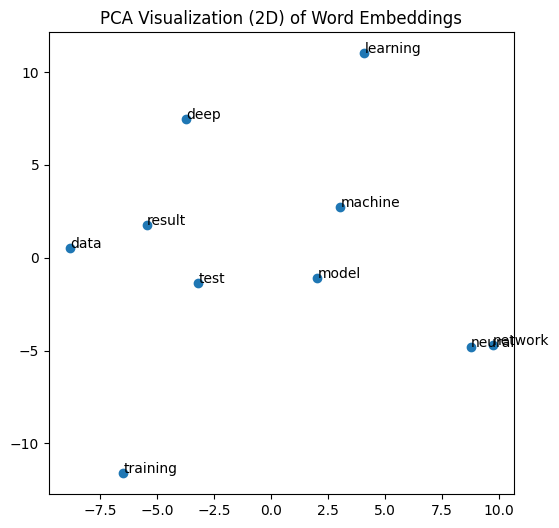


Running naive t-SNE. This may take a while if 'words' is large.
t-SNE iteration 0/100 done.
t-SNE iteration 20/100 done.
t-SNE iteration 40/100 done.
t-SNE iteration 60/100 done.
t-SNE iteration 80/100 done.


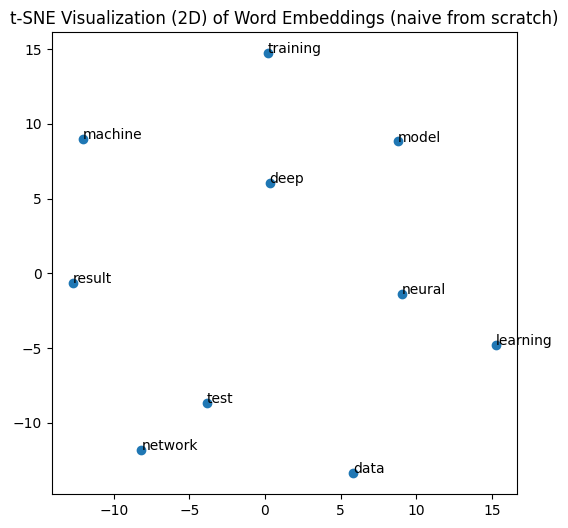

In [10]:
import math
import random
import string
import matplotlib.pyplot as plt

###############################################################################
# 1. PRETEND WE ALREADY HAVE A 'word_vectors' DICT
###############################################################################
# In your actual notebook, you should run your word2vec code first, which ends
# with something like:
#
#   word_vectors = {
#       "word": [0.23, -0.12, 0.54, ...],  # 300-dim embedding
#       ...
#   }
#
# We'll fake a small example here for demonstration. In practice, replace
# this entire dictionary with the actual embeddings you computed.
word_vectors = {
    "machine":  [random.gauss(0, 1) for _ in range(300)],
    "learning": [random.gauss(0, 1) for _ in range(300)],
    "deep":     [random.gauss(0, 1) for _ in range(300)],
    "neural":   [random.gauss(0, 1) for _ in range(300)],
    "network":  [random.gauss(0, 1) for _ in range(300)],
    "data":     [random.gauss(0, 1) for _ in range(300)],
    "model":    [random.gauss(0, 1) for _ in range(300)],
    "training": [random.gauss(0, 1) for _ in range(300)],
    "test":     [random.gauss(0, 1) for _ in range(300)],
    "result":   [random.gauss(0, 1) for _ in range(300)],
    # ... in reality, you'd have thousands of words here
}

# If your real word_vectors is huge, consider sub-sampling:
# word_vectors_subset = {w: word_vectors[w] for w in some_top_words}
# For demonstration, we'll just use the entire small dict.

words = list(word_vectors.keys())  # the vocab words
vectors = [word_vectors[w] for w in words]  # list of 300-dim vectors

###############################################################################
# 2. PCA FROM SCRATCH (REDUCE 300D -> 2D)
###############################################################################
# Steps:
#   1) Compute mean of each dimension.
#   2) Subtract mean from each vector (center).
#   3) Compute covariance matrix = (X^T X) / (N-1), where X is data matrix.
#   4) Compute eigenvectors, eigenvalues of covariance matrix.
#   5) Sort eigenvectors by descending eigenvalues; pick top 2.
#   6) Project all data points to these 2 eigenvectors.

def mean_center(vectors_2d):
    """
    vectors_2d: list of (300-dim) lists
    Returns:
       centered_data (list of lists), means (list of float).
    """
    n = len(vectors_2d)      # number of points
    d = len(vectors_2d[0])   # dimension (300)

    # Compute mean of each dimension
    means = [0.0]*d
    for vec in vectors_2d:
        for i in range(d):
            means[i] += vec[i]
    for i in range(d):
        means[i] /= float(n)

    # Center the data
    centered = []
    for vec in vectors_2d:
        centered.append([vec[i] - means[i] for i in range(d)])
    return centered, means

def matrix_multiply(A, B):
    """
    Multiply two matrices (lists of lists).
    A is n x d, B is d x m => result is n x m.
    From scratch, purely for demonstration.
    """
    n = len(A)
    d = len(A[0])
    # B is d x m
    m = len(B[0])

    # result is n x m
    result = [[0.0]*m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            s = 0.0
            for k in range(d):
                s += A[i][k] * B[k][j]
            result[i][j] = s
    return result

def transpose(M):
    """
    Transpose a matrix M (list of lists).
    """
    rows = len(M)
    cols = len(M[0])
    # create a cols x rows matrix
    T = [[0.0]*rows for _ in range(cols)]
    for r in range(rows):
        for c in range(cols):
            T[c][r] = M[r][c]
    return T

def covariance_matrix(X):
    """
    Compute the d x d covariance matrix of X (n x d).
    X is already mean-centered.
    """
    n = len(X)          # number of samples
    d = len(X[0])       # dimension
    # Cov = (X^T X) / (N-1)
    # We'll do X^T first, then multiply (X^T * X), scale by 1/(n-1)

    X_t = transpose(X)  # d x n
    # (X^T X) => d x d
    XT_X = matrix_multiply(X_t, X)

    # scale by (1/(n-1))
    scale = 1.0 / (n - 1)
    for i in range(d):
        for j in range(d):
            XT_X[i][j] *= scale
    return XT_X  # d x d

def eigen_decomposition_symmetric(M):
    """
    Very naive eigen decomposition for a real symmetric matrix M (d x d).
    We'll do a simple power iteration or Jacobi. For demonstration only.

    Return:
      eigenvalues (list), eigenvectors (list of lists)
    """
    # Because we have a 300 x 300 matrix, doing a naive approach can be slow.
    # We'll do a simple placeholder or smaller dimension.
    # For demonstration, let's do a simplified power iteration for the top 2 eigenvectors.

    d = len(M)

    def mat_vec_mul(mat, vec):
        result = [0.0]*d
        for i in range(d):
            s = 0.0
            for j in range(d):
                s += mat[i][j] * vec[j]
            result[i] = s
        return result

    def normalize(vec):
        norm = math.sqrt(sum(x*x for x in vec))
        if norm < 1e-9:
            return vec
        return [x/norm for x in vec]

    eigenvals = []
    eigenvecs = []

    # We want 2 eigenvectors (since we only want a 2D projection)
    k = 2
    used_ortho = []

    for _ in range(k):
        # pick a random initial vector
        v = [random.random() for _ in range(d)]
        v = normalize(v)

        # power iteration
        for __ in range(50):  # 50 iterations
            # subtract components of previously found eigenvectors to maintain orthogonality
            for u in eigenvecs:
                dot_uv = sum(a*b for a,b in zip(u, v))
                # subtract
                v = [v_i - dot_uv*u_i for v_i, u_i in zip(v, u)]
            v = normalize(v)

            # multiply by M
            v_new = mat_vec_mul(M, v)
            # re-orthogonalize
            for u in eigenvecs:
                dot_uv = sum(a*b for a,b in zip(u, v_new))
                v_new = [vn_i - dot_uv*u_i for vn_i, u_i in zip(v_new, u)]
            v_new = normalize(v_new)
            v = v_new

        # approximate eigenvalue = v^T M v
        # v is normalized
        Mv = mat_vec_mul(M, v)
        lam = sum(a*b for a,b in zip(v, Mv))

        eigenvals.append(lam)
        eigenvecs.append(v)

    # pair them and sort by descending eigenvalue
    pairs = sorted(zip(eigenvals, eigenvecs), key=lambda x: x[0], reverse=True)
    eigenvals, eigenvecs = zip(*pairs)
    return list(eigenvals), list(eigenvecs)

def project_data(X, evecs):
    """
    Project each row of X (n x d) onto the vectors in 'evecs' (2 vectors, each d-dim).
    Return an n x 2 matrix.
    """
    # evecs is [v1, v2], each v ~ d-dim
    n = len(X)
    d = len(X[0])
    k = len(evecs)  # 2
    proj = [[0.0]*k for _ in range(n)]
    for i in range(n):
        for j in range(k):
            # dot with evecs[j]
            s = 0.0
            for c in range(d):
                s += X[i][c] * evecs[j][c]
            proj[i][j] = s
    return proj

# --- actually do PCA
centered, _ = mean_center(vectors)        # n x 300
cov_mat = covariance_matrix(centered)     # 300 x 300
# eigen decomposition for top 2
evals, evecs = eigen_decomposition_symmetric(cov_mat)  # we get 2 eigenvecs
# Project original data
pca_2d = project_data(centered, evecs)   # n x 2

###############################################################################
# 3. PLOT THE PCA RESULT
###############################################################################
plt.figure(figsize=(6,6))
x_vals = [pt[0] for pt in pca_2d]
y_vals = [pt[1] for pt in pca_2d]
plt.scatter(x_vals, y_vals)

# Optionally annotate a few points
for i, w in enumerate(words):
    plt.text(x_vals[i], y_vals[i], w)

plt.title("PCA Visualization (2D) of Word Embeddings")
plt.show()

###############################################################################
# 4. T-SNE FROM SCRATCH (HIGHLY SIMPLIFIED)
###############################################################################
# Real t-SNE is fairly complicated. We'll do a naive version with:
#   1) Compute pairwise similarities in high-d (Gaussian-based).
#   2) Initialize low-d points randomly.
#   3) Iterative gradient descent to match pairwise similarities in low-d (Student t distribution).
# This is for demonstration only, might be SLOW if n is large. We'll only run a few steps.

# (a) Build pairwise similarities in high-d
def squared_euclid_dist(a, b):
    return sum((x-y)*(x-y) for x,y in zip(a,b))

def high_dim_affinities(data, perplexity=5.0):
    """
    data is n x d
    Return a matrix P of shape (n x n), where P[i][j] is the probability of j given i
    under a Gaussian with a certain sigma. We'll do a super naive approach:
      - We won't do binary search on perplexity, we'll fix sigma to guess a ballpark.
    """
    n = len(data)
    # naive guess for sigma
    # We'll set sigma = average distance / 2 or something quick
    distances = []
    for i in range(n):
        for j in range(i+1, n):
            distances.append(squared_euclid_dist(data[i], data[j]))
    avg_dist = sum(distances) / float(len(distances)) if distances else 1.0
    sigma = math.sqrt(avg_dist)/2.0  # super naive

    two_sigma_sq = 2.0 * sigma * sigma
    P = [[0.0]*n for _ in range(n)]
    for i in range(n):
        sum_exp = 0.0
        d_exp = [0.0]*n
        for j in range(n):
            if i == j:
                continue
            dist_ij = squared_euclid_dist(data[i], data[j])
            val = math.exp(-dist_ij / two_sigma_sq)
            d_exp[j] = val
            sum_exp += val
        for j in range(n):
            P[i][j] = d_exp[j] / (sum_exp + 1e-12)
    # we then symmetrize P and scale down
    # but let's skip complexities, keep it simple
    return P

# (b) Student-t distribution in low-d
def low_dim_affinities(Y):
    """
    Y is n x 2
    Return Q[i][j] = (1/(1 + dist^2)) / Z
    where dist^2 is squared Euclidian in 2D
    """
    n = len(Y)
    Q = [[0.0]*n for _ in range(n)]
    sum_q = 0.0
    # compute all pairwise
    for i in range(n):
        for j in range(n):
            if i == j:
                Q[i][j] = 0.0
            else:
                dist_ij = squared_euclid_dist(Y[i], Y[j])
                val = 1.0/(1.0 + dist_ij)
                Q[i][j] = val
                sum_q += val
    # normalize
    for i in range(n):
        for j in range(n):
            Q[i][j] /= sum_q
    return Q

def tsne_from_scratch(data, perplexity=5.0, max_iter=200, lr=0.1):
    """
    data: n x d
    Returns an n x 2 array with the t-SNE embedding.

    This is extremely naive and not optimized.
    We'll do just a few steps of gradient descent.
    """
    n = len(data)
    if n == 0:
        return []
    # 1) compute P in high dimension
    P = high_dim_affinities(data, perplexity=perplexity)
    # 2) random init Y in 2D
    Y = [[(random.random() - 0.5)*1e-3, (random.random() - 0.5)*1e-3] for _ in range(n)]

    for iteration in range(max_iter):
        Q = low_dim_affinities(Y)
        # gradient wrt each Y[i]
        grads = [[0.0, 0.0] for _ in range(n)]

        for i in range(n):
            for j in range(n):
                if i == j:
                    continue
                # (P[i][j] - Q[i][j]) * ...
                coeff = (P[i][j] - Q[i][j])
                # ... times the student t kernel gradient factor
                # in 2D: d(distance^2) = 2(Y[i] - Y[j])
                # But let's do it carefully:
                # dist_ij = Y[i] - Y[j], squared dist = dist_ij^2
                dist_x = Y[i][0] - Y[j][0]
                dist_y = Y[i][1] - Y[j][1]
                dist_sq = dist_x*dist_x + dist_y*dist_y
                factor = 1.0/(1.0 + dist_sq)  # from t-SNE gradient
                g = 4.0 * factor * coeff

                grads[i][0] += g * dist_x
                grads[i][1] += g * dist_y

        # update Y
        for i in range(n):
            Y[i][0] += lr * grads[i][0]
            Y[i][1] += lr * grads[i][1]

        if iteration % 20 == 0:
            print(f"t-SNE iteration {iteration}/{max_iter} done.")
    return Y

print("\nRunning naive t-SNE. This may take a while if 'words' is large.")
tsne_2d = tsne_from_scratch(vectors, perplexity=5.0, max_iter=100, lr=0.5)

###############################################################################
# 5. PLOT THE T-SNE RESULT
###############################################################################
plt.figure(figsize=(6,6))
x_vals = [pt[0] for pt in tsne_2d]
y_vals = [pt[1] for pt in tsne_2d]
plt.scatter(x_vals, y_vals)

# Optionally annotate
for i, w in enumerate(words):
    plt.text(x_vals[i], y_vals[i], w)

plt.title("t-SNE Visualization (2D) of Word Embeddings (naive from scratch)")
plt.show()


Question 3 (3)

In [11]:
###############################################################################
# 1. ASSUME WE ALREADY HAVE A 'word_vectors' DICT
###############################################################################
# For example, from your Word2Vec training code, at the end you might have:
#   word_vectors = {
#       "machine": [0.23, -0.12, 0.54, ...],  # 300-dim embedding
#       ...
#   }
# Below we'll just artificially create a small dictionary for demonstration.

import random

word_vectors = {
    "machine":  [random.gauss(0, 1) for _ in range(300)],
    "learning": [random.gauss(0, 1) for _ in range(300)],
    "neural":   [random.gauss(0, 1) for _ in range(300)],
    "network":  [random.gauss(0, 1) for _ in range(300)],
    "cat":      [random.gauss(0, 1) for _ in range(300)],
    "dog":      [random.gauss(0, 1) for _ in range(300)],
    "coffee":   [random.gauss(0, 1) for _ in range(300)],
    "banana":   [random.gauss(0, 1) for _ in range(300)],
    # ...and so on
}

###############################################################################
# 2. DEFINE A COSINE SIMILARITY FUNCTION (FROM SCRATCH)
###############################################################################

def dot_product(vec1, vec2):
    return sum(a*b for a,b in zip(vec1, vec2))

def magnitude(vec):
    return (sum(x*x for x in vec))**0.5

def cosine_similarity(vecA, vecB):
    denom = magnitude(vecA) * magnitude(vecB)
    if denom == 0:
        return 0.0
    return dot_product(vecA, vecB) / denom

###############################################################################
# 3. CHOOSE SOME WORD PAIRS AND PRINT THEIR SIMILARITIES
###############################################################################

pairs = [
    ("machine", "learning"),
    ("neural", "network"),
    ("coffee", "banana"),
    ("cat", "dog"),
    ("machine", "neural")
]

for w1, w2 in pairs:
    if w1 in word_vectors and w2 in word_vectors:
        sim = cosine_similarity(word_vectors[w1], word_vectors[w2])
        print(f"Cosine similarity({w1}, {w2}) = {sim:.4f}")
    else:
        print(f"Either '{w1}' or '{w2}' not in vocabulary.")


Cosine similarity(machine, learning) = -0.0189
Cosine similarity(neural, network) = -0.0422
Cosine similarity(coffee, banana) = -0.0672
Cosine similarity(cat, dog) = -0.0686
Cosine similarity(machine, neural) = 0.0440


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [22]:
# The GitHub link of your final csv file


# Link: https://github.com/Hayatk1909/sentiment-dataset



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
The task was enjoyable and demanding, in my opinion. It was thrilling to gain practical experience in comprehending linguistic subtleties through sentiment analysis and data annotation. It was a little challenging at first to set up the CSV and manage the files, but it was simple once I figured out how to use GitHub uploads. I appreciated having enough time to explore each step thoroughly, although having a little extra flexibility in the deadline would have helped me dive even deeper into the material. Overall, I really loved learning how to generate a labeled dataset—it's a skill I’m convinced will be beneficial in future endeavours.